<a href="https://colab.research.google.com/github/hstorm/ML_course_Calabria2020/blob/master/lCalabria_Day2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebook for Day 2

# during lecture



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import tree



In [ ]:

# Download data
!wget http://www.ilr.uni-bonn.de/agpo/courses/ml/brazil_all_data_v2.csv

In [4]:
# Load data with pandas into a dataframe 
df = pd.read_csv('brazil_all_data_v2.csv')

In [ ]:
# Define binary variable for deforestration in 2018
df['D_defor_2018'] = df['defor_2018']>0
Y_all = df['D_defor_2018']

In [ ]:
# Define a list of features names (explantory variables)
lstX = [
  'wdpa_2017',
  'population_2015',
  'chirps_2017',
  'defor_2017',
  'maize',
  'soy',
  'sugarcane',
  'perc_treecover',
  'perm_water',
  'travel_min',
  'cropland',
  # 'pasture',
  'mean_elev',
  'sd_elev',
  'near_road',
  'defor_2017_lag_1st_order',
  'wdpa_2017_lag_1st_order',
  'chirps_2017_lag_1st_order',
  'population_2015_lag_1st_order',
  'maize_lag_1st_order',
  'soy_lag_1st_order',
  'sugarcane_lag_1st_order',
  'perc_treecover_lag_1st_order',
  'perm_water_lag_1st_order',
  'travel_min_lag_1st_order',
  'cropland_lag_1st_order',
  # 'pasture_lag_1st_order',
  'mean_elev_lag_1st_order',
  'sd_elev_lag_1st_order',
  'near_road_lag_1st_order',
 ]

# Get the explanatory Variables
X_all =  df.loc[:,lstX]

In [ ]:
# Split the data into train and test data using sklearn train_test_split object
#   (see: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

#   Note: This randomly split the data in 80% train and 20% test data
X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X_all, Y_all, test_size = 0.2)

In [ ]:
# Scale data to 0-1 range using sklearn MinMaxScalar object 
# (see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) 
scaler = MinMaxScaler()
# Use only the train data to fit the MinMaxScalar 
scaler.fit(X_train_raw)

# Apply the MinMax transformation to the train and test data 
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
# Note the depended variable does not need to be scaled as it is a binary variable anyway

Run logit on deforestation dummy variable

In [ ]:
# Fit a logistic regression model using sklearn (see: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
# Create the model object
modelLg = LogisticRegression(random_state=0,penalty='none',fit_intercept=True,max_iter=1000)
# Fit the model using the training data
modelLg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Function to print model stats
def printOutput(mod,X_train,Y_train,X_test,Y_test):
  # view results
  print('Score in train', mod.score(X_train, Y_train))
  print('Score in test', mod.score(X_test, Y_test))

  Y_test_had_Tree = mod.predict(X_test)

  print('\nConfusion Matrix')
  print(pd.DataFrame(confusion_matrix(Y_test, Y_test_had_Tree),
            index=pd.MultiIndex.from_arrays([['actual','actual'], ['False','True']]),
            columns=pd.MultiIndex.from_arrays([['predicted','predicted'], ['False','True']])))

In [ ]:
printOutput(modelLg,X_train,Y_train,X_test,Y_test)

# Compute ROC curve and ROC area for each class
Y_score = modelLg.decision_function(X_test)
fpr_Lg, tpr_Lg, _ = roc_curve(Y_test, Y_score)
roc_auc_Lg = auc(fpr_Lg, tpr_Lg)
print('ROC AUC', roc_auc_Lg)

Score in train 0.7859886372729455
Score in test 0.7842682243738497

Confusion Matrix
             predicted      
                 False  True
actual False     36661  1369
       True       9415  2543
ROC AUC 0.759984912132423


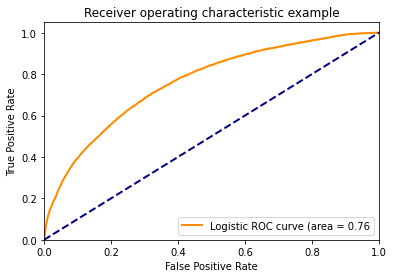

In [ ]:

plt.figure()
lw = 2
plt.plot(fpr_Lg, tpr_Lg, color='darkorange',
         lw=lw, label='Logistic ROC curve (area = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Now run a decision tree using the same specification

In [ ]:
# run a decision tree using sklearn
modelTree = tree.DecisionTreeClassifier()
modelTree = modelTree.fit(X_train, Y_train)

In [ ]:
printOutput(modelTree,X_train,Y_train,X_test,Y_test)

Score in train 1.0
Score in test 0.7607825878210771

Confusion Matrix
             predicted      
                 False  True
actual False     31836  6194
       True       5764  6194


Run the same model using  a random forest

In [ ]:
# run a random forest using sklearn and default hyperparameters
from sklearn.ensemble import RandomForestClassifier

modelForest = RandomForestClassifier()
modelForest = modelForest.fit(X_train, Y_train)

In [ ]:
printOutput(modelForest,X_train,Y_train,X_test,Y_test)


Score in train 0.9999799951988477
Score in test 0.8340601744418661

Confusion Matrix
             predicted      
                 False  True
actual False     35608  2422
       True       5873  6085


Visualizing the results

In [ ]:
# Produce a ROC-AOC curve
# See here https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py

# ==> For trees ROC are not directly avalaible and do not really make sense
# Lets discuss this again

Feature ranking:
1. wdpa_2017 (0.160032)
2. population_2015 (0.079812)
3. chirps_2017 (0.048172)
4. defor_2017 (0.040586)
5. maize (0.037295)
6. soy (0.036441)
7. sugarcane (0.036398)
8. perc_treecover (0.035493)
9. perm_water (0.034524)
10. travel_min (0.034050)
11. cropland (0.033895)
12. mean_elev (0.033588)
13. sd_elev (0.033558)
14. near_road (0.031809)
15. defor_2017_lag_1st_order (0.031606)
16. wdpa_2017_lag_1st_order (0.030106)
17. chirps_2017_lag_1st_order (0.029528)
18. population_2015_lag_1st_order (0.029429)
19. maize_lag_1st_order (0.029141)
20. soy_lag_1st_order (0.027549)
21. sugarcane_lag_1st_order (0.025291)
22. perc_treecover_lag_1st_order (0.024872)
23. perm_water_lag_1st_order (0.024136)
24. travel_min_lag_1st_order (0.023392)
25. cropland_lag_1st_order (0.021399)
26. mean_elev_lag_1st_order (0.012760)
27. sd_elev_lag_1st_order (0.008548)
28. near_road_lag_1st_order (0.006591)


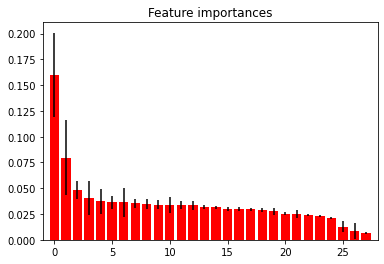

In [ ]:
# generate a feature importance graph
# Adjusted based on  https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

importances = modelForest.feature_importances_
std = np.std([tree.feature_importances_ for tree in modelForest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")


for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, lstX[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Lab 2a 

The first part of today's lab will have you predict deforestation using both a random forest and XGboost models

In [ ]:
# Run RF on deforestation


In [ ]:
# Run XGBoost on deforestation
import xgboost as xgb
model_xgb = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
model_xgb.fit(X_train, Y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:

printOutput(model_xgb,X_train,Y_train,X_test,Y_test)


Score in train 0.820601944466672
Score in test 0.8184364247419381

Confusion Matrix
             predicted      
                 False  True
actual False     35368  2662
       True       6414  5544


In [ ]:
# Comprae outcome from all models
print('\n--- Logistic')
printOutput(modelLg,X_train,Y_train,X_test,Y_test)

print('\n--- Tree')
printOutput(modelTree,X_train,Y_train,X_test,Y_test)

print('\n--- Forest')
printOutput(modelForest,X_train,Y_train,X_test,Y_test)

print('\n--- XG Boost')
printOutput(model_xgb,X_train,Y_train,X_test,Y_test)



--- Logistic
Score in train 0.7859886372729455
Score in test 0.7842682243738497

Confusion Matrix
             predicted      
                 False  True
actual False     36661  1369
       True       9415  2543

--- Tree
Score in train 1.0
Score in test 0.7607825878210771

Confusion Matrix
             predicted      
                 False  True
actual False     31836  6194
       True       5764  6194

--- Forest
Score in train 0.9999799951988477
Score in test 0.8340601744418661

Confusion Matrix
             predicted      
                 False  True
actual False     35608  2422
       True       5873  6085

--- XG Boost
Score in train 0.820601944466672
Score in test 0.8184364247419381

Confusion Matrix
             predicted      
                 False  True
actual False     35368  2662
       True       6414  5544


# Lab 2b

The second part of today's lab will estimate Shapley Values for your random forest model of deforestation

Specifically, deterimine how much protected areas seems to explain the prediction of deforestation (and discuss one or two other features that determine deforestation)


In [ ]:

!pip install shap

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394120 sha256=71c7c191f0f40af11bd116d1f44dcf8968e8ca9754f169601e0980c95f387163
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [ ]:
import shap
# load JS visualization code to notebook
shap.initjs()


# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model_xgb)
df_X_train = pd.DataFrame(X_train,columns=lstX)
shap_values = explainer.shap_values(df_X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], df_X_train.iloc[0,:])

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


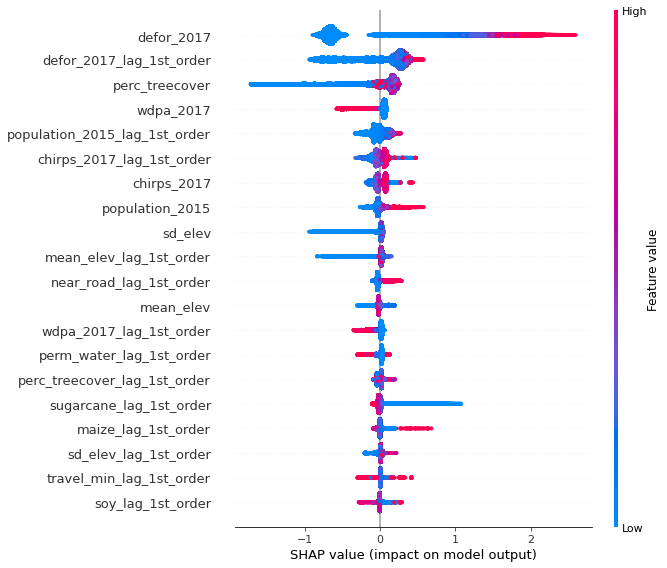

In [ ]:
# summarize the effects of all the features
shap.summary_plot(shap_values, df_X_train)

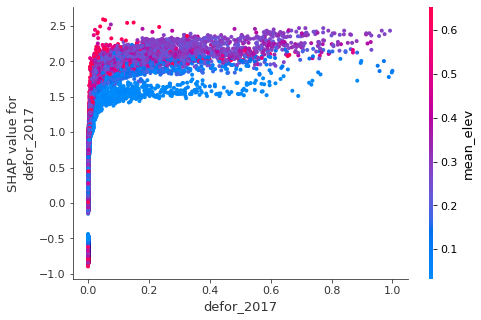

In [ ]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("defor_2017", shap_values, df_X_train)